In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('daily-total-female-births-CA.csv',parse_dates = [0])

In [4]:
df.head() #Looking at the firstfive row of the dataset

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


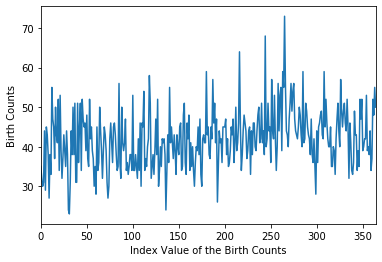

In [8]:
df['births'].plot()
plt.xlabel('Index Value of the Birth Counts')
plt.ylabel('Birth Counts')
plt.show()

- the plt.plot gives plots line plots based upon the values in y-axis and index in x-axis. 
- Since the birth counts belong to respective date and to understand it, we are making the dates as Index.

In [11]:
df.index = df['date']

In [18]:
df.head()

,date,births
date,,
1959-01-01,1959-01-01,35
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44


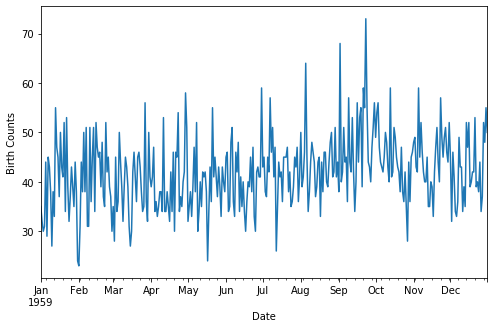

In [41]:
plt.figure(figsize = (8,5)) #to set the dimension for the plot. 
df['births'].plot()
plt.xlabel('Date')
plt.ylabel('Birth Counts')
plt.show()

- Viewing plot for birth counts in January.
- Since we have the DateTime in index, we can use 'DataFrame.loc[datetime]' to specify the values required.
- Also Since we have the DatTime as a feature we can use Boolean Function like '<,>,=' to select the required values. 

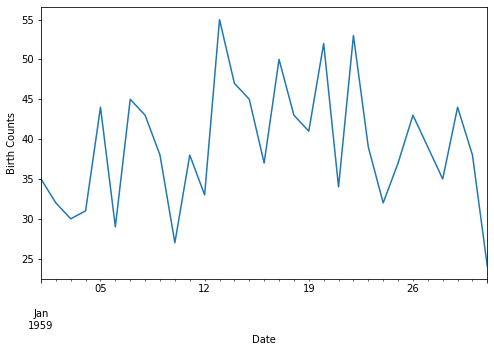

In [29]:
#Using index to select the January Birth Counts
df_jan = df.loc['1959-01']
plt.figure(figsize = (8,5)) #to set the dimension for the plot. 
df_jan['births'].plot()
plt.xlabel('Date')
plt.ylabel('Birth Counts')
plt.show()

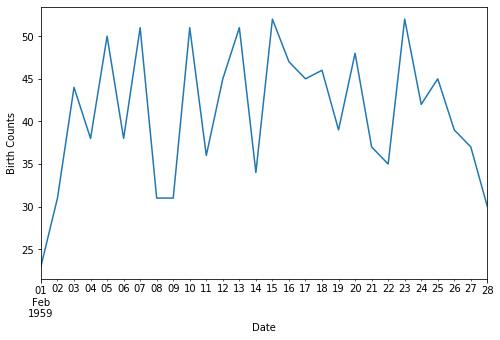

In [40]:
#Using Boolean Operations to select the February Birth Counts
df_feb = df[(df['date']>= '1959-2-1')&(df['date']< '1959-3-1')]
plt.figure(figsize = (8,5))
df_feb['births'].plot()
plt.xlabel('Date')
plt.ylabel('Birth Counts')
plt.show()

#### Trendline
 - Using regplot from seaborn library to check the basic trendline in the BirthCounts

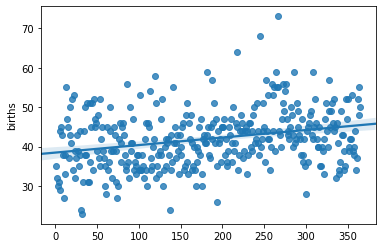

In [69]:
sns.regplot(x = list(range(1,366)), y = df['births']) #list(range(1,366) gives the number of days in list
plt.show()

From the plot we can see that there is an increase in the birth counts as days pass in the year 1959

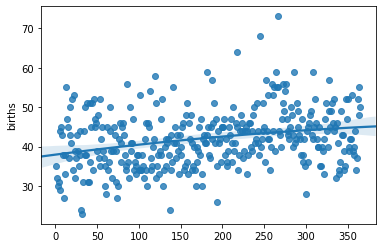

In [70]:
sns.regplot(x = list(range(1,366)), y = df['births'], order = 2) #plot the line using quadratic formula
plt.show()

In [75]:
miles_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', parse_dates= [0])

In [76]:
miles_df.shape

(96, 2)

In [78]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


Month = With Year and Month

MilesMM = Miles Counsumed by air crafts in Millions

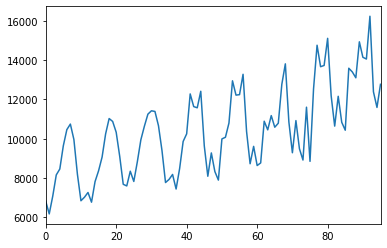

In [79]:
miles_df['MilesMM'].plot()

Seasonality is present

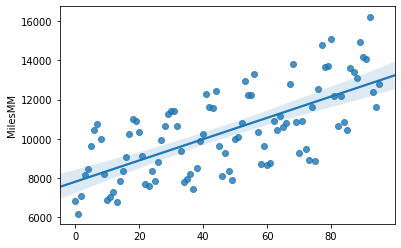

In [82]:
sns.regplot(x = miles_df.index.values, y = miles_df['MilesMM'])

In [85]:
import datetime as dt

In [87]:
miles_df['year'] = miles_df['Month'].dt.year

In [88]:
miles_df.head()

,Month,MilesMM,year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963


In [89]:
miles_df.groupby('year')['MilesMM'].agg('mean')

year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

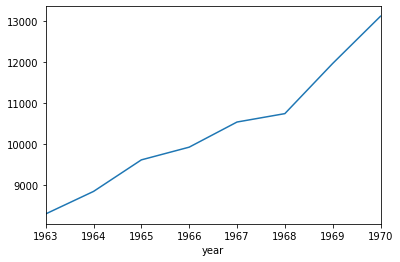

In [90]:
miles_df.groupby('year')['MilesMM'].agg('mean').plot()

### Creating Lag Plot

In [91]:
miles_df['lag1'] = miles_df['MilesMM'].shift(1)

In [93]:
miles_df.head()

,Month,MilesMM,year,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


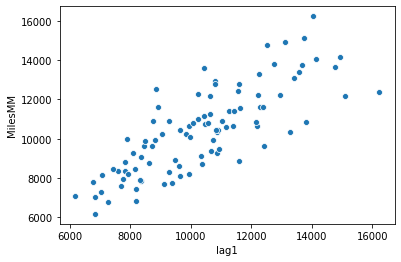

In [95]:
sns.scatterplot(x = miles_df['lag1'] , y= miles_df['MilesMM'])

Positive Correlation between the Lagged and Actual Values

Istead of creating a new feature for lag, we can directing create it using lag_plot from pandas.plotting

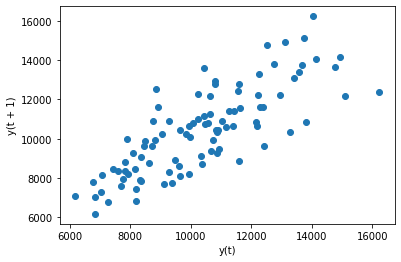

In [97]:
from pandas.plotting import lag_plot
lag_plot(miles_df['MilesMM']) #default lag value is 1, if needed we can change it. 

### AutoCorrelation Plot

In [98]:
from pandas .plotting import autocorrelation_plot

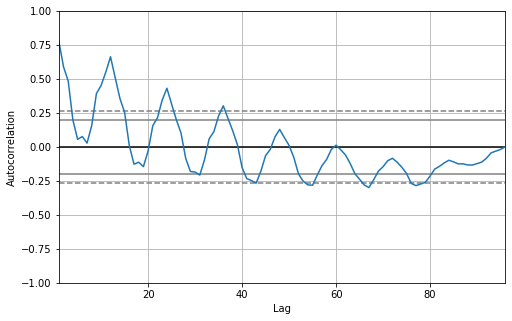

In [100]:
plt.figure(figsize = (8,5))
autocorrelation_plot(miles_df['MilesMM'])
plt.show()

Correlation of Actual Values with it's Lag Values

We can see in dip in the Miles for every 6 months showing the seasonality.